## Import packages and housekeeping

In [3]:
# Hide irrelevant warning messages
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [4]:
# Import packages
import pandas as pd
import datetime
import numpy as np
import math as math
import astropy
import scipy
import itur
from datetime import datetime
from matplotlib import pyplot as plt

In [5]:
# supress scientific notation display
np.set_printoptions(suppress=True)

In [6]:
itur.models.itu618.change_version(13)
itur.models.itu618.get_version()

13

--------------------------------------------------------------------------------------------------------------------------------

## Read in XY file

In [9]:
# Read in .txt file

xyoutput = pd.read_csv('ReportFileXY.txt', delimiter = ",")
xyoutput

,LEO_Sat.UTCGregorian,LEO_Sat.Earth.Altitude,LEO_Sat.EarthMJ2000Eq.X,LEO_Sat.EarthMJ2000Eq.Y,LEO_Sat.EarthMJ2000Eq.Z,LEO_Sat.EarthMJ2000Eq.VX,LEO_Sat.EarthMJ2000Eq.VY,LEO_Sat.EarthMJ2000Eq.VZ
0,19 Mar 2024 00:00:00.000,499.863700,-1.263468e-12,-6878.000000,0.000000,-1.059481,1.946235e-16,7.538598
1,19 Mar 2024 00:01:00.000,499.935473,-6.352158e+01,-6862.818279,451.982049,-1.057126,5.058689e-01,7.521910
2,19 Mar 2024 00:03:00.753,500.507546,-1.902234e+02,-6740.632308,1353.514528,-1.038278,1.514820e+00,7.387625
3,19 Mar 2024 00:05:14.914,501.761532,-3.269110e+02,-6463.891520,2326.042082,-0.995642,2.603023e+00,7.083550
4,19 Mar 2024 00:07:18.841,503.397290,-4.468382e+02,-6081.567058,3179.202600,-0.936778,3.557385e+00,6.663596
...,...,...,...,...,...,...,...,...
2052,21 Mar 2024 23:52:57.777,501.978995,3.855054e+02,4962.207712,-4735.387781,1.060531,-5.249424e+00,-5.415409
2053,21 Mar 2024 23:55:10.597,505.144054,5.216943e+02,4213.901388,-5400.781471,0.986512,-5.998100e+00,-4.586097
2054,21 Mar 2024 23:57:21.107,508.102783,6.445624e+02,3389.909621,-5940.812333,0.893113,-6.607043e+00,-3.675286
2055,21 Mar 2024 23:59:24.462,510.573111,7.483968e+02,2545.902716,-6337.368659,0.787792,-7.055842e+00,-2.744349


In [10]:
# Check column data types

xyoutput.dtypes

LEO_Sat.UTCGregorian         object
LEO_Sat.Earth.Altitude      float64
LEO_Sat.EarthMJ2000Eq.X     float64
LEO_Sat.EarthMJ2000Eq.Y     float64
LEO_Sat.EarthMJ2000Eq.Z     float64
LEO_Sat.EarthMJ2000Eq.VX    float64
LEO_Sat.EarthMJ2000Eq.VY    float64
LEO_Sat.EarthMJ2000Eq.VZ    float64
dtype: object

In [11]:
# Change UTCGregorian to type datetime

xyoutput['LEO_Sat.UTCGregorian'] = pd.to_datetime(xyoutput['LEO_Sat.UTCGregorian'])
xyoutput

,LEO_Sat.UTCGregorian,LEO_Sat.Earth.Altitude,LEO_Sat.EarthMJ2000Eq.X,LEO_Sat.EarthMJ2000Eq.Y,LEO_Sat.EarthMJ2000Eq.Z,LEO_Sat.EarthMJ2000Eq.VX,LEO_Sat.EarthMJ2000Eq.VY,LEO_Sat.EarthMJ2000Eq.VZ
0,2024-03-19 00:00:00.000,499.863700,-1.263468e-12,-6878.000000,0.000000,-1.059481,1.946235e-16,7.538598
1,2024-03-19 00:01:00.000,499.935473,-6.352158e+01,-6862.818279,451.982049,-1.057126,5.058689e-01,7.521910
2,2024-03-19 00:03:00.753,500.507546,-1.902234e+02,-6740.632308,1353.514528,-1.038278,1.514820e+00,7.387625
3,2024-03-19 00:05:14.914,501.761532,-3.269110e+02,-6463.891520,2326.042082,-0.995642,2.603023e+00,7.083550
4,2024-03-19 00:07:18.841,503.397290,-4.468382e+02,-6081.567058,3179.202600,-0.936778,3.557385e+00,6.663596
...,...,...,...,...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,3.855054e+02,4962.207712,-4735.387781,1.060531,-5.249424e+00,-5.415409
2053,2024-03-21 23:55:10.597,505.144054,5.216943e+02,4213.901388,-5400.781471,0.986512,-5.998100e+00,-4.586097
2054,2024-03-21 23:57:21.107,508.102783,6.445624e+02,3389.909621,-5940.812333,0.893113,-6.607043e+00,-3.675286
2055,2024-03-21 23:59:24.462,510.573111,7.483968e+02,2545.902716,-6337.368659,0.787792,-7.055842e+00,-2.744349


In [12]:
# New dataframe with just XYZ columns
# change columns names

xyoutput['UTC Gregorian'] = xyoutput['LEO_Sat.UTCGregorian']
xyoutput['altitude (km)'] = xyoutput['LEO_Sat.Earth.Altitude']
xyoutput['x-coordinate'] = xyoutput['LEO_Sat.EarthMJ2000Eq.X']
xyoutput['y-coordinate'] = xyoutput['LEO_Sat.EarthMJ2000Eq.Y']
xyoutput['z-coordinate'] = xyoutput['LEO_Sat.EarthMJ2000Eq.Z']
xyoutput['x velocity'] = xyoutput['LEO_Sat.EarthMJ2000Eq.VX']
xyoutput['y velocity'] = xyoutput['LEO_Sat.EarthMJ2000Eq.VY']
xyoutput['z velocity'] = xyoutput['LEO_Sat.EarthMJ2000Eq.VZ']

xydf = xyoutput[["UTC Gregorian","altitude (km)","x-coordinate", "y-coordinate", "z-coordinate", "x velocity", "y velocity", "z velocity"]]
xydf

,UTC Gregorian,altitude (km),x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity
0,2024-03-19 00:00:00.000,499.863700,-1.263468e-12,-6878.000000,0.000000,-1.059481,1.946235e-16,7.538598
1,2024-03-19 00:01:00.000,499.935473,-6.352158e+01,-6862.818279,451.982049,-1.057126,5.058689e-01,7.521910
2,2024-03-19 00:03:00.753,500.507546,-1.902234e+02,-6740.632308,1353.514528,-1.038278,1.514820e+00,7.387625
3,2024-03-19 00:05:14.914,501.761532,-3.269110e+02,-6463.891520,2326.042082,-0.995642,2.603023e+00,7.083550
4,2024-03-19 00:07:18.841,503.397290,-4.468382e+02,-6081.567058,3179.202600,-0.936778,3.557385e+00,6.663596
...,...,...,...,...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,3.855054e+02,4962.207712,-4735.387781,1.060531,-5.249424e+00,-5.415409
2053,2024-03-21 23:55:10.597,505.144054,5.216943e+02,4213.901388,-5400.781471,0.986512,-5.998100e+00,-4.586097
2054,2024-03-21 23:57:21.107,508.102783,6.445624e+02,3389.909621,-5940.812333,0.893113,-6.607043e+00,-3.675286
2055,2024-03-21 23:59:24.462,510.573111,7.483968e+02,2545.902716,-6337.368659,0.787792,-7.055842e+00,-2.744349


In [13]:
# Check data types again

xydf.dtypes

UTC Gregorian    datetime64[ns]
altitude (km)           float64
x-coordinate            float64
y-coordinate            float64
z-coordinate            float64
x velocity              float64
y velocity              float64
z velocity              float64
dtype: object

In [14]:
# save dataframe to .txt file
xydf.to_csv('xycoord_processed.txt', sep=',')

--------------------------------------------------------------------------------------------------------------------------------

## Read in lat/long of sat

In [17]:
# Read in lat/long of satellite in relation to Earth

latlongoutput = pd.read_csv('ReportFilelatlong.txt', delimiter = ",")

# Change UTCGregorian to type datetime

latlongoutput['LEO_Sat.UTCGregorian'] = pd.to_datetime(latlongoutput['LEO_Sat.UTCGregorian'])

# change column names

latlongoutput['UTC Gregorian'] = latlongoutput['LEO_Sat.UTCGregorian']
latlongoutput['altitude (km)'] = latlongoutput['LEO_Sat.Earth.Altitude']
latlongoutput['latitude (deg)'] = latlongoutput['LEO_Sat.Earth.Latitude']
latlongoutput['longitude (deg)'] = latlongoutput['LEO_Sat.Earth.Longitude']

latlongoutput = latlongoutput[['UTC Gregorian', 'altitude (km)', 'latitude (deg)', 'longitude (deg)']]


latlongoutput

,UTC Gregorian,altitude (km),latitude (deg),longitude (deg)
0,2024-03-19 00:00:00.000,499.863700,-0.002083,93.277250
1,2024-03-19 00:01:00.000,499.935473,3.787994,92.487413
2,2024-03-19 00:03:00.753,500.507546,11.412670,90.878635
3,2024-03-19 00:05:14.914,501.761532,19.872898,89.018084
4,2024-03-19 00:07:18.841,503.397290,27.669929,87.171784
...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,-43.739547,-92.485058
2053,2024-03-21 23:55:10.597,505.144054,-51.980063,-95.697123
2054,2024-03-21 23:57:21.107,508.102783,-59.977602,-100.007888
2055,2024-03-21 23:59:24.462,510.573111,-67.366227,-106.218307


In [18]:
# save dataframe to .txt file
latlongoutput.to_csv('latlongcoord_processed.txt', sep=',')

--------------------------------------------------------------------------------------------------------------------------------

## Read in topo coords

In [21]:
# Requires calculations using coord transforms
# Read in .txt file and change UTCGregorian column to datetime format

topooutput = pd.read_csv('ReportFiletopo.txt', delimiter = ",")
topooutput['LEO_Sat.UTCGregorian'] = pd.to_datetime(topooutput['LEO_Sat.UTCGregorian'])

# change column names

topooutput['UTC Gregorian'] = topooutput['LEO_Sat.UTCGregorian']
topooutput['altitude (km)'] = topooutput['LEO_Sat.Earth.Altitude']
topooutput['x-coordinate'] = topooutput['LEO_Sat.topo.X']
topooutput['y-coordinate'] = topooutput['LEO_Sat.topo.Y']
topooutput['z-coordinate'] = topooutput['LEO_Sat.topo.Z']
topooutput['x velocity'] = topooutput['LEO_Sat.topo.VX']
topooutput['y velocity'] = topooutput['LEO_Sat.topo.VY']
topooutput['z velocity'] = topooutput['LEO_Sat.topo.VZ']


topooutput = topooutput[['UTC Gregorian', 'altitude (km)', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'x velocity', 'y velocity', 'z velocity']]


topooutput

,UTC Gregorian,altitude (km),x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity
0,2024-03-19 00:00:00.000,499.863700,-4689.528597,4924.441604,-7452.383473,-0.582988,1.102337,7.598025
1,2024-03-19 00:01:00.000,499.935473,-4713.946092,4979.382438,-6994.421674,-0.231155,0.727834,7.661613
2,2024-03-19 00:03:00.753,500.507546,-4699.448987,5020.910362,-6066.464786,0.468720,-0.043035,7.684427
3,2024-03-19 00:05:14.914,501.761532,-4585.746450,4956.920409,-5042.937820,1.220425,-0.911383,7.544989
4,2024-03-19 00:07:18.841,503.397290,-4393.394866,4794.503689,-4123.795532,1.876645,-1.707373,7.264800
...,...,...,...,...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,4070.486930,-3895.176068,-10300.397858,-3.325784,2.874603,-6.316311
2053,2024-03-21 23:55:10.597,505.144054,3590.279585,-3466.701744,-11092.887829,-3.889920,3.566917,-5.595052
2054,2024-03-21 23:57:21.107,508.102783,3051.497627,-2960.461999,-11770.228758,-4.350352,4.178237,-4.766438
2055,2024-03-21 23:59:24.462,510.573111,2492.787545,-2413.297704,-12304.987768,-4.692706,4.679782,-3.890119


In [22]:
# save dataframe to .txt file
topooutput.to_csv('topocoord_processed.txt', sep=',')

--------------------------------------------------------------------------------------------------------------------------------

## Convert from cartesian to spherical

In [25]:
# Distance between satellite and ground station in XYZ coordinates
# This is given by the radial coordinate


xsq = xyoutput['x-coordinate']**2
ysq = xyoutput['y-coordinate']**2
zsq = xyoutput['z-coordinate']**2

xyoutput['radial (km)'] = np.sqrt((xsq) + (ysq) + (zsq))
xyoutput['radial (km)']


0       6878.000000
1       6877.979173
2       6877.812911
3       6877.444015
4       6876.950734
           ...     
2052    6869.935753
2053    6870.048786
2054    6870.240109
2055    6870.513800
2056    6870.611506
Name: radial (km), Length: 2057, dtype: float64

In [26]:
# polar angle theta in radians

xcoord = xyoutput['x-coordinate']
ycoord = xyoutput['y-coordinate']

xyoutput['theta (rad)'] = np.arctan(xcoord/ycoord)
xyoutput['theta (rad)']

0       1.836970e-16
1       9.255639e-03
2       2.821292e-02
3       5.053190e-02
4       7.334239e-02
            ...     
2052    7.753256e-02
2053    1.231764e-01
2054    1.878985e-01
2055    2.859075e-01
2056    3.262140e-01
Name: theta (rad), Length: 2057, dtype: float64

In [27]:
# azimuthal angle phi
zcoord = xyoutput['z-coordinate']
radial = xyoutput['radial (km)']

xyoutput['azi (rad)'] = np.arccos(zcoord/radial)
xyoutput['azi (rad)']

0       1.570796
1       1.505035
2       1.372709
3       1.225779
4       1.090211
          ...   
2052    2.331307
2053    2.475326
2054    2.615383
2055    2.745048
2056    2.781501
Name: azi (rad), Length: 2057, dtype: float64

In [28]:
# New dataframe with converted radial, polar and azi

convdf = xyoutput[["UTC Gregorian","radial (km)", "theta (rad)", "azi (rad)"]]
convdf

,UTC Gregorian,radial (km),theta (rad),azi (rad)
0,2024-03-19 00:00:00.000,6878.000000,1.836970e-16,1.570796
1,2024-03-19 00:01:00.000,6877.979173,9.255639e-03,1.505035
2,2024-03-19 00:03:00.753,6877.812911,2.821292e-02,1.372709
3,2024-03-19 00:05:14.914,6877.444015,5.053190e-02,1.225779
4,2024-03-19 00:07:18.841,6876.950734,7.334239e-02,1.090211
...,...,...,...,...
2052,2024-03-21 23:52:57.777,6869.935753,7.753256e-02,2.331307
2053,2024-03-21 23:55:10.597,6870.048786,1.231764e-01,2.475326
2054,2024-03-21 23:57:21.107,6870.240109,1.878985e-01,2.615383
2055,2024-03-21 23:59:24.462,6870.513800,2.859075e-01,2.745048


In [29]:
# save dataframe to .txt file
convdf.to_csv('sphericalcoord_processed.txt', sep=',')

--------------------------------------------------------------------------------------------------------------------------------

## Calculate the elevation angle

In [32]:
# Elevation angle as a function of time

In [33]:
#calculate radial distance of satellite from ground station

txsq = topooutput['x-coordinate']**2
tysq = topooutput['y-coordinate']**2
tzsq = topooutput['z-coordinate']**2

topooutput['radial (km)'] = np.sqrt((txsq) + (tysq) + (tzsq))
topooutput['radial (m)'] = topooutput['radial (km)'] * 1000
topooutput['radial (m)']

0       1.008860e+07
1       9.794768e+06
2       9.170407e+06
3       8.428010e+06
4       7.700316e+06
            ...     
2052    1.174050e+07
2053    1.216389e+07
2054    1.251456e+07
2055    1.278478e+07
2056    1.285141e+07
Name: radial (m), Length: 2057, dtype: float64

In [34]:
# display topocentric dataframe
dftopo = topooutput[["UTC Gregorian", "altitude (km)", "radial (km)", "x-coordinate", "y-coordinate", "z-coordinate"]]
dftopo


,UTC Gregorian,altitude (km),radial (km),x-coordinate,y-coordinate,z-coordinate
0,2024-03-19 00:00:00.000,499.863700,10088.598664,-4689.528597,4924.441604,-7452.383473
1,2024-03-19 00:01:00.000,499.935473,9794.767572,-4713.946092,4979.382438,-6994.421674
2,2024-03-19 00:03:00.753,500.507546,9170.406569,-4699.448987,5020.910362,-6066.464786
3,2024-03-19 00:05:14.914,501.761532,8428.009985,-4585.746450,4956.920409,-5042.937820
4,2024-03-19 00:07:18.841,503.397290,7700.316465,-4393.394866,4794.503689,-4123.795532
...,...,...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,11740.504950,4070.486930,-3895.176068,-10300.397858
2053,2024-03-21 23:55:10.597,505.144054,12163.892834,3590.279585,-3466.701744,-11092.887829
2054,2024-03-21 23:57:21.107,508.102783,12514.561839,3051.497627,-2960.461999,-11770.228758
2055,2024-03-21 23:59:24.462,510.573111,12784.784688,2492.787545,-2413.297704,-12304.987768


In [35]:
dfmerged = pd.merge(topooutput, latlongoutput, on='UTC Gregorian', how='inner')
dfmerged = pd.DataFrame(dfmerged)

In [36]:
dfmerged

,UTC Gregorian,altitude (km)_x,x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity,radial (km),radial (m),altitude (km)_y,latitude (deg),longitude (deg)
0,2024-03-19 00:00:00.000,499.863700,-4689.528597,4924.441604,-7452.383473,-0.582988,1.102337,7.598025,10088.598664,1.008860e+07,499.863700,-0.002083,93.277250
1,2024-03-19 00:01:00.000,499.935473,-4713.946092,4979.382438,-6994.421674,-0.231155,0.727834,7.661613,9794.767572,9.794768e+06,499.935473,3.787994,92.487413
2,2024-03-19 00:03:00.753,500.507546,-4699.448987,5020.910362,-6066.464786,0.468720,-0.043035,7.684427,9170.406569,9.170407e+06,500.507546,11.412670,90.878635
3,2024-03-19 00:05:14.914,501.761532,-4585.746450,4956.920409,-5042.937820,1.220425,-0.911383,7.544989,8428.009985,8.428010e+06,501.761532,19.872898,89.018084
4,2024-03-19 00:07:18.841,503.397290,-4393.394866,4794.503689,-4123.795532,1.876645,-1.707373,7.264800,7700.316465,7.700316e+06,503.397290,27.669929,87.171784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2024-03-21 23:52:57.777,501.978995,4070.486930,-3895.176068,-10300.397858,-3.325784,2.874603,-6.316311,11740.504950,1.174050e+07,501.978995,-43.739547,-92.485058
2053,2024-03-21 23:55:10.597,505.144054,3590.279585,-3466.701744,-11092.887829,-3.889920,3.566917,-5.595052,12163.892834,1.216389e+07,505.144054,-51.980063,-95.697123
2054,2024-03-21 23:57:21.107,508.102783,3051.497627,-2960.461999,-11770.228758,-4.350352,4.178237,-4.766438,12514.561839,1.251456e+07,508.102783,-59.977602,-100.007888
2055,2024-03-21 23:59:24.462,510.573111,2492.787545,-2413.297704,-12304.987768,-4.692706,4.679782,-3.890119,12784.784688,1.278478e+07,510.573111,-67.366227,-106.218307


In [37]:
# distance to horizon
r = 6371 # km
h = 0.5 # km

d = np.sqrt((r + h)**2 - r**2)
neg_d = (-1)*d
print ("The horizon line is taken to be", d, "km from the ground station")

The horizon line is taken to be 79.82011024798199 km from the ground station


In [38]:
# points within horizon

dfele = dfmerged[(dfmerged['x-coordinate'] < d) & (dfmerged['y-coordinate'] < d) & (dfmerged['z-coordinate'] > 0)]
dfele

,UTC Gregorian,altitude (km)_x,x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity,radial (km),radial (m),altitude (km)_y,latitude (deg),longitude (deg)
13,2024-03-19 00:26:23.054,513.347653,-26.547728,-397.008160,480.878319,4.585704,-6.153008,-0.346895,624.150798,6.241508e+05,513.347653,76.890915,-55.670012
57,2024-03-19 01:58:36.089,514.390866,-565.494332,66.005628,469.894505,1.896325,-7.439340,0.222266,738.201482,7.382015e+05,514.390866,81.758946,-37.180882
58,2024-03-19 02:00:35.835,513.524882,-341.711733,-824.693220,434.630516,1.835937,-7.414677,-0.810411,992.869327,9.928693e+05,513.524882,77.846327,-75.520627
59,2024-03-19 02:02:38.745,512.031402,-121.501907,-1727.319663,270.547911,1.742323,-7.249457,-1.855402,1752.595818,1.752596e+06,512.031402,71.354696,-92.439094
102,2024-03-19 03:33:07.515,514.230833,-619.075102,-327.471533,457.650090,-1.164764,-7.577192,-0.470325,836.621295,8.366213e+05,514.230833,81.770544,-60.324895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2024-03-21 12:14:59.044,513.519080,-1928.880203,-1007.084554,141.070026,-5.080455,5.727874,-0.616627,2180.527204,2.180527e+06,513.519080,80.938323,-153.328326
1721,2024-03-21 12:17:00.930,512.954951,-2522.711017,-296.512153,8.259341,-4.648372,5.913589,-1.559273,2540.090264,2.540090e+06,512.954951,81.142906,155.177349
1764,2024-03-21 13:47:34.489,513.344362,-1980.442258,-1595.079048,7.558622,-2.849953,7.078465,0.881768,2542.928594,2.542929e+06,513.344362,76.020038,-148.198636
1765,2024-03-21 13:49:38.281,513.393175,-2305.906230,-703.896024,58.266825,-2.399480,7.296588,-0.063674,2411.652582,2.411653e+06,513.393175,81.134717,-179.642649


In [39]:
altitude = dfele['altitude (km)_x']
distance = d

# calculate elevation in radians
elev = altitude/distance
# convert elevation in radians to degrees
dfele['elevation (deg)'] = np.arctan(elev) * (180/math.pi)
dfele['elevation (deg)']

C:\Users\xxrac\AppData\Local\Temp\ipykernel_26288\1541371648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfele['elevation (deg)'] = np.arctan(elev) * (180/math.pi)


13      81.161887
57      81.179529
58      81.164889
59      81.139528
102     81.176827
          ...    
1720    81.164791
1721    81.155228
1764    81.161831
1765    81.162659
1810    81.161586
Name: elevation (deg), Length: 73, dtype: float64

In [40]:
# exclude any data where elevation < 10
elevation = dfele['elevation (deg)']

dfele[(elevation > 10)]

,UTC Gregorian,altitude (km)_x,x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity,radial (km),radial (m),altitude (km)_y,latitude (deg),longitude (deg),elevation (deg)
13,2024-03-19 00:26:23.054,513.347653,-26.547728,-397.008160,480.878319,4.585704,-6.153008,-0.346895,624.150798,6.241508e+05,513.347653,76.890915,-55.670012,81.161887
57,2024-03-19 01:58:36.089,514.390866,-565.494332,66.005628,469.894505,1.896325,-7.439340,0.222266,738.201482,7.382015e+05,514.390866,81.758946,-37.180882,81.179529
58,2024-03-19 02:00:35.835,513.524882,-341.711733,-824.693220,434.630516,1.835937,-7.414677,-0.810411,992.869327,9.928693e+05,513.524882,77.846327,-75.520627,81.164889
59,2024-03-19 02:02:38.745,512.031402,-121.501907,-1727.319663,270.547911,1.742323,-7.249457,-1.855402,1752.595818,1.752596e+06,512.031402,71.354696,-92.439094,81.139528
102,2024-03-19 03:33:07.515,514.230833,-619.075102,-327.471533,457.650090,-1.164764,-7.577192,-0.470325,836.621295,8.366213e+05,514.230833,81.770544,-60.324895,81.176827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2024-03-21 12:14:59.044,513.519080,-1928.880203,-1007.084554,141.070026,-5.080455,5.727874,-0.616627,2180.527204,2.180527e+06,513.519080,80.938323,-153.328326,81.164791
1721,2024-03-21 12:17:00.930,512.954951,-2522.711017,-296.512153,8.259341,-4.648372,5.913589,-1.559273,2540.090264,2.540090e+06,512.954951,81.142906,155.177349,81.155228
1764,2024-03-21 13:47:34.489,513.344362,-1980.442258,-1595.079048,7.558622,-2.849953,7.078465,0.881768,2542.928594,2.542929e+06,513.344362,76.020038,-148.198636,81.161831
1765,2024-03-21 13:49:38.281,513.393175,-2305.906230,-703.896024,58.266825,-2.399480,7.296588,-0.063674,2411.652582,2.411653e+06,513.393175,81.134717,-179.642649,81.162659


In [41]:
dfmerged['elevation (deg)'] = dfele['elevation (deg)']
dfmerged = dfmerged[dfmerged['elevation (deg)'].notna()]
dfmerged

,UTC Gregorian,altitude (km)_x,x-coordinate,y-coordinate,z-coordinate,x velocity,y velocity,z velocity,radial (km),radial (m),altitude (km)_y,latitude (deg),longitude (deg),elevation (deg)
13,2024-03-19 00:26:23.054,513.347653,-26.547728,-397.008160,480.878319,4.585704,-6.153008,-0.346895,624.150798,6.241508e+05,513.347653,76.890915,-55.670012,81.161887
57,2024-03-19 01:58:36.089,514.390866,-565.494332,66.005628,469.894505,1.896325,-7.439340,0.222266,738.201482,7.382015e+05,514.390866,81.758946,-37.180882,81.179529
58,2024-03-19 02:00:35.835,513.524882,-341.711733,-824.693220,434.630516,1.835937,-7.414677,-0.810411,992.869327,9.928693e+05,513.524882,77.846327,-75.520627,81.164889
59,2024-03-19 02:02:38.745,512.031402,-121.501907,-1727.319663,270.547911,1.742323,-7.249457,-1.855402,1752.595818,1.752596e+06,512.031402,71.354696,-92.439094,81.139528
102,2024-03-19 03:33:07.515,514.230833,-619.075102,-327.471533,457.650090,-1.164764,-7.577192,-0.470325,836.621295,8.366213e+05,514.230833,81.770544,-60.324895,81.176827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2024-03-21 12:14:59.044,513.519080,-1928.880203,-1007.084554,141.070026,-5.080455,5.727874,-0.616627,2180.527204,2.180527e+06,513.519080,80.938323,-153.328326,81.164791
1721,2024-03-21 12:17:00.930,512.954951,-2522.711017,-296.512153,8.259341,-4.648372,5.913589,-1.559273,2540.090264,2.540090e+06,512.954951,81.142906,155.177349,81.155228
1764,2024-03-21 13:47:34.489,513.344362,-1980.442258,-1595.079048,7.558622,-2.849953,7.078465,0.881768,2542.928594,2.542929e+06,513.344362,76.020038,-148.198636,81.161831
1765,2024-03-21 13:49:38.281,513.393175,-2305.906230,-703.896024,58.266825,-2.399480,7.296588,-0.063674,2411.652582,2.411653e+06,513.393175,81.134717,-179.642649,81.162659


In [42]:
# save dataframe to .txt file
dfmerged.to_csv('elevation_processed.txt', sep=',')

--------------------------------------------------------------------------------------------------------------------------------

## Calculating the loss components

### frequency and wavelength of signal

In [46]:
# Frequency and wavelength of the signal

# Frequency in GHz (half-way between Ku and Ka bands - 26GHz is high Ku/low Ka)
f = 26000000000 # In Hz
c = 2.998*10**8 # In ms^-1


# Wavelength
wl = (c)/f

print ("The frequency is ", f, "Hz")
print ("The wavelength is ", wl, "m")


The frequency is  26000000000 Hz
The wavelength is  0.011530769230769232 m


### free space path loss

In [48]:
# Calculating free space path loss

# put altitude into metres
topooutput['altitude (m)'] = topooutput['altitude (km)'] * 1000

topooutput['FSPL'] = ((4 * (math.pi) * (topooutput['altitude (m)'])/wl)**2)
topooutput['FSPL'] = (10)*(np.log10)(topooutput['FSPL'])
topooutput['FSPL']

0       174.724064
1       174.725311
2       174.735244
3       174.756979
4       174.785249
           ...    
2052    174.760743
2053    174.815337
2054    174.866063
2055    174.908190
2056    174.918909
Name: FSPL, Length: 2057, dtype: float64

<AxesSubplot:title={'center':'Free space path loss as a function of time'}, xlabel='UTC Gregorian', ylabel='FSPL'>

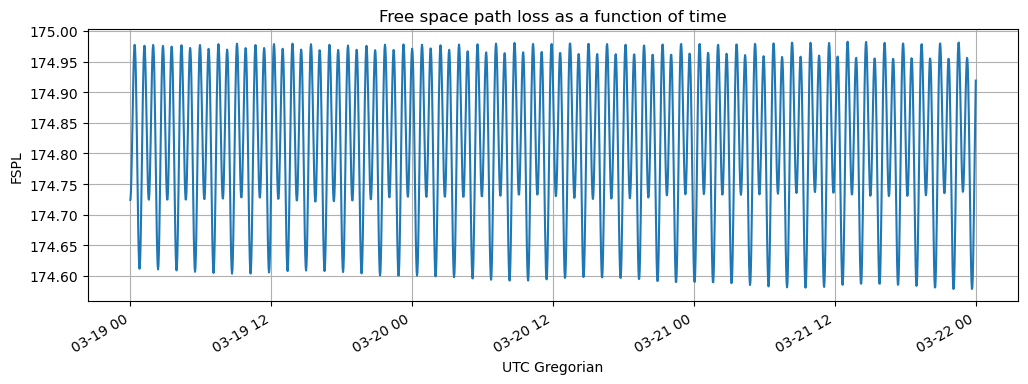

In [49]:
# free space path loss as a function of time

topofspl = topooutput[['UTC Gregorian', 'FSPL']]

%matplotlib inline
topofspl.plot(x='UTC Gregorian', y='FSPL', ylabel='FSPL', title='Free space path loss as a function of time', legend=False, grid=True, figsize=(12,4))

### satellite and ground station contact times and durations

In [51]:
header_row=['Start Time (UTC)', 'Stop Time (UTC)', 'Duration (s)']
contact = pd.read_csv('ContactLocatorGround_Station.txt', skiprows=[0,1,2,3], names=header_row, delimiter = "    ") 
contact

C:\Users\xxrac\AppData\Local\Temp\ipykernel_26288\1397094904.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  contact = pd.read_csv('ContactLocatorGround_Station.txt', skiprows=[0,1,2,3], names=header_row, delimiter = "    ")


,Start Time (UTC),Stop Time (UTC),Duration (s)
0,19 Mar 2024 00:22:09.048,19 Mar 2024 00:29:17.305,428.256489
1,19 Mar 2024 01:55:36.821,19 Mar 2024 02:02:27.375,410.553650
2,19 Mar 2024 03:28:49.226,19 Mar 2024 03:35:37.044,407.817922
3,19 Mar 2024 05:01:56.747,19 Mar 2024 05:09:00.954,424.207031
4,19 Mar 2024 06:35:23.693,19 Mar 2024 06:42:38.225,434.531231
5,19 Mar 2024 08:09:37.375,19 Mar 2024 08:16:20.046,402.671268
6,19 Mar 2024 09:45:07.429,19 Mar 2024 09:49:49.180,281.750129
7,19 Mar 2024 19:20:13.275,19 Mar 2024 19:22:31.065,137.789789
8,19 Mar 2024 20:53:08.953,19 Mar 2024 20:59:07.452,358.498984
9,19 Mar 2024 22:26:47.856,19 Mar 2024 22:33:53.509,425.653413


--------------------------------------------------------------------------------------------------------------------------------

## Slant range as function of time

In [54]:
# Slant range as a function of time

# first calculate geometric semi-angle
# all in radians

altquo = (6371/(6371+(dfele['altitude (km)_x'])))

dfele['ele rad'] = (dfele['elevation (deg)']) * (math.pi / 180)
neg = (-1) * (dfele['ele rad'])

cos = np.cos(dfele['ele rad'])

arccos = altquo * (cos)

dfele['phi'] = (neg) + (np.arccos(arccos))
dfele['phi']

C:\Users\xxrac\AppData\Local\Temp\ipykernel_26288\4024506576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfele['ele rad'] = (dfele['elevation (deg)']) * (math.pi / 180)
C:\Users\xxrac\AppData\Local\Temp\ipykernel_26288\4024506576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfele['phi'] = (neg) + (np.arccos(arccos))


13      0.011584
57      0.011583
58      0.011584
59      0.011586
102     0.011583
          ...   
1720    0.011584
1721    0.011585
1764    0.011584
1765    0.011584
1810    0.011584
Name: phi, Length: 73, dtype: float64

In [55]:
# calculate slant range 
# all in radians

alt = (6371+(dfele['altitude (km)_x']))

dfele['Slant range'] = ((alt) * np.sin(dfele['phi']))/(np.cos(dfele['ele rad']))
dfele['Slant range']

C:\Users\xxrac\AppData\Local\Temp\ipykernel_26288\2295364902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfele['Slant range'] = ((alt) * np.sin(dfele['phi']))/(np.cos(dfele['ele rad']))


13      519.048713
57      520.079656
58      519.223854
59      517.748015
102     519.921502
           ...    
1720    519.218121
1721    518.660643
1764    519.045461
1765    519.093699
1810    519.031142
Name: Slant range, Length: 73, dtype: float64

<AxesSubplot:title={'center':'Slant range as a function of time'}, xlabel='UTC Gregorian', ylabel='Slant range'>

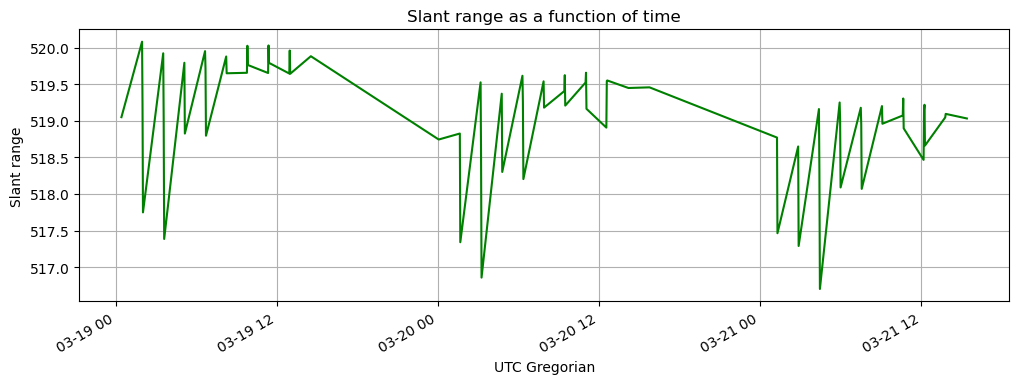

In [56]:
# plot slant range as a function of time
toposr = dfele[['UTC Gregorian', 'Slant range']]

%matplotlib inline
toposr.plot(x='UTC Gregorian', y='Slant range', ylabel='Slant range', color='green', legend=False, title='Slant range as a function of time', grid=True, figsize=(12,4))

--------------------------------------------------------------------------------------------------------------------------------

## Attenuation

In [59]:
# unavailability due to rainfall as a percentage of time

# ground station latitude
latgs = 17.134718  # degrees

# grouns station longitude
longgs = 15.242803

# rainfall rate based on ITU-R 837 data
R = 8   # mm/h

p = itur.models.itu837.unavailability_from_rainfall_rate(latgs, longgs, R)
p


0.019568180924711954

--------------------------------------------------------------------------------------------------------------------------------

## Atmospheric attenuation on slant path

In [62]:
# satellite latitude
latarr = np.array([dfmerged['latitude (deg)']])

# satellite longitude
longarr = np.array([dfmerged['longitude (deg)']])

# signal frequency
fghz = 25    # equation below requires GHz

# Elevation as a function of time

elearr = np.array([dfmerged['elevation (deg)']])

# unavailability due to rainfall as a percentage of time
# see calculation above

# Approximate diameter of the receiver at ground station
D = 10   # in metres

# ground station height above sea-level
hs = 0.5 # In km

# Aperture efficiency
# Usually between 0.5 - 0.7
# taking 0.5 in line with ITU recommendation 
eta = 0.5 

In [63]:
latarr

array([[76.89091515, 81.75894605, 77.84632733, 71.35469583, 81.77054448,
        77.77505878, 70.58988145, 81.77979429, 77.40825318, 79.5234576 ,
        81.81909429, 77.80707555, 79.41497597, 81.84629974, 73.79113352,
        79.75001966, 81.78478763, 73.74632265, 79.62766471, 81.8241663 ,
        74.52930111, 80.19343588, 81.60086995, 79.70251624, 77.76700844,
        78.07511032, 71.71948402, 81.70575766, 77.57285988, 70.43590015,
        81.68382282, 77.03378003, 80.00196413, 81.67442462, 77.17922197,
        79.9021349 , 81.71613424, 74.69303771, 80.35430481, 81.53631134,
        75.60660082, 80.89937945, 81.19284806, 70.12545189, 76.93356087,
        81.53720808, 81.61134569, 81.00227401, 79.96617065, 74.29100805,
        79.93130125, 74.05541201, 81.8762576 , 79.25783041, 72.39521585,
        78.53774738, 81.88943857, 78.79110304, 78.38514492, 81.88213761,
        79.1182147 , 78.52780115, 81.89116453, 73.86082185, 79.83477906,
        81.7361317 , 68.69093123, 75.68352201, 80.9

In [64]:
# atmospheric attenuation on slant path

attslpath = itur.atmospheric_attenuation_slant_path(latarr , longarr, 25 , elearr , p , D , hs, None, None, eta, None, None, None, 1000.0, None, 45, None, 'approx', False, True, True, True, True)

attslpath

<Quantity [1.38402379, 1.19084507, 2.23729148, 2.56557017, 1.26398816,
           1.57636854, 3.1715023 , 1.74035682, 2.88517751, 1.18946873,
           3.03186745, 2.99132601, 1.44727016, 3.10840926, 1.94232522,
           2.61014142, 3.3923702 , 1.75769576, 2.99372512, 2.50305732,
           3.05091824, 3.64163546, 2.66535724, 3.39535192, 1.10409349,
           1.57410384, 2.35173104, 1.33567353, 0.74735027, 3.62960519,
           1.76935384, 2.26376494, 1.24072055, 3.0163599 , 3.0111946 ,
           1.41308316, 3.13745094, 2.49266491, 2.87963941, 3.66424252,
           1.62949362, 2.73425214, 2.5317604 , 3.59579131, 3.14531079,
           3.21910624, 2.53025654, 2.75184819, 1.23566487, 2.54687431,
           1.27006552, 1.51577875, 1.34924387, 2.27427302, 3.25994485,
           0.94995188, 1.87121671, 2.8765469 , 1.13599745, 3.04834882,
           3.3773115 , 2.50678422, 2.95148504, 1.45851234, 3.11964505,
           3.17224477, 3.67943122, 2.74371311, 3.51613864, 2.71825165,
      

In [65]:
dfaa = pd.DataFrame(attslpath, columns=['Slant path attenuation'])
dfaa

,Slant path attenuation
0,1.384024
1,1.190845
2,2.237291
3,2.565570
4,1.263988
...,...
68,3.516139
69,2.718252
70,3.230501
71,2.550152


In [66]:
dfaa['UTC Gregorian'] = latlongoutput['UTC Gregorian']
dfaa

,Slant path attenuation,UTC Gregorian
0,1.384024,2024-03-19 00:00:00.000
1,1.190845,2024-03-19 00:01:00.000
2,2.237291,2024-03-19 00:03:00.753
3,2.565570,2024-03-19 00:05:14.914
4,1.263988,2024-03-19 00:07:18.841
...,...,...
68,3.516139,2024-03-19 02:21:40.373
69,2.718252,2024-03-19 02:23:49.038
70,3.230501,2024-03-19 02:25:55.540
71,2.550152,2024-03-19 02:27:59.484


<AxesSubplot:title={'center':'Slant path attenuation as a function of time'}, xlabel='UTC Gregorian', ylabel='Slant path attenuation'>

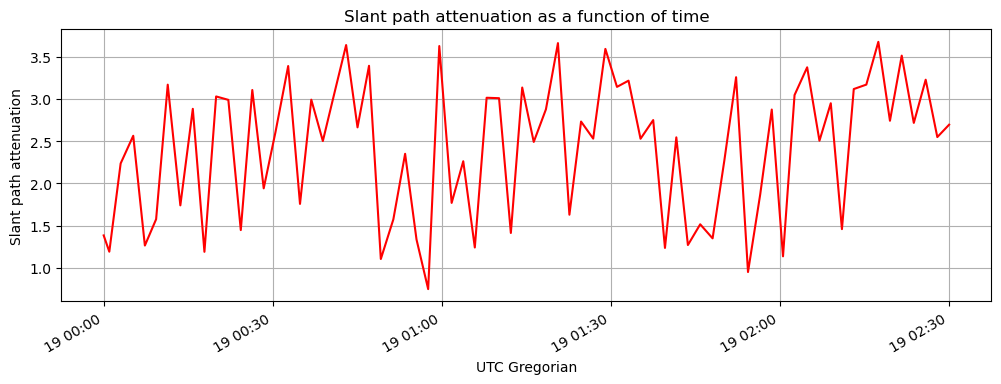

In [67]:
# plottotal attenuation as a function of time
toposla = dfaa[['UTC Gregorian', 'Slant path attenuation']]

%matplotlib inline
toposla.plot(x='UTC Gregorian', y='Slant path attenuation', ylabel='Slant path attenuation', color='red', title='Slant path attenuation as a function of time', legend=False, grid=True, figsize=(12,4))

--------------------------------------------------------------------------------------------------------------------------------

## Attenuation due to rain

In [70]:
# using arrays for satellite lat/long

latsat = np.array([latlongoutput['latitude (deg)']])
longsat = np.array([latlongoutput['longitude (deg)']])

In [71]:
# calculate long-term rain attenuation statistics from point rainfall rate

rainstat = itur.models.itu618.rain_attenuation(latarr, longarr, fghz, elearr, hs, p, None, 45, None)
rainstat

<Quantity [1.06821593, 0.78798388, 1.63155381, 1.72591479, 0.74632114,
           0.79833765, 2.18165575, 1.15366822, 2.03300164, 0.83553525,
           2.2039735 , 2.06892058, 0.91409936, 2.26387349, 1.22109153,
           1.79384119, 2.54292167, 0.87814809, 2.12916923, 1.67020858,
           2.08226488, 2.77697199, 1.80419526, 2.52224343, 0.87201026,
           1.04520875, 1.54063528, 0.855434  , 0.        , 2.679083  ,
           1.22307607, 1.45124879, 0.88734653, 2.19013986, 2.08455323,
           0.88763455, 2.29130024, 1.76264895, 2.06025638, 2.81262682,
           0.82246479, 1.85936899, 1.67954036, 2.58701853, 2.23181417,
           2.38020782, 1.69203053, 1.88098023, 0.91578886, 1.78234045,
           0.74785954, 0.7109563 , 0.84844142, 1.46997142, 2.22689884,
           0.71059723, 1.29033232, 1.98031017, 0.74194912, 2.21867401,
           2.48822521, 1.8852997 , 2.10047135, 0.68914713, 2.27971891,
           2.33678547, 2.71812251, 1.87668122, 2.65487212, 1.85687259,
      

In [72]:
dfrs = pd.DataFrame(rainstat, columns=['Rain stats'])
dfrs

,Rain stats
0,1.068216
1,0.787984
2,1.631554
3,1.725915
4,0.746321
...,...
68,2.654872
69,1.856873
70,2.291160
71,1.695460


--------------------------------------------------------------------------------------------------------------------------------

## Rainfall probability

In [75]:
# Percentage probability of rain in an average year (%)

P_0 = itur.models.itu837.rainfall_probability(latarr, longarr)
P_0

<Quantity [0.37903132, 0.45028378, 1.01042093, 1.45229012, 0.82195319,
           0.86725737, 1.36042738, 0.46985694, 1.55233745, 0.4147169 ,
           1.40315173, 1.70520575, 0.43336458, 1.4789162 , 1.45823935,
           1.20159731, 1.54890484, 0.54380026, 1.5632746 , 1.64821056,
           1.54125095, 1.66855268, 1.83355035, 1.79163351, 0.18317924,
           0.64059113, 1.43883877, 0.78157626, 0.94646729, 1.06542025,
           0.45225099, 0.88205132, 0.45027757, 1.41871563, 1.73320048,
           0.37989569, 1.48666782, 1.58325992, 1.49380658, 1.57747469,
           0.49898099, 1.56453563, 1.73471593, 1.74424323, 1.62945743,
           1.62740544, 1.73664613, 1.89999314, 0.37816584, 1.65546868,
           0.36641147, 0.99415915, 0.83374915, 0.8883497 , 1.49582051,
           0.1479195 , 0.47415495, 1.6045214 , 0.358995  , 1.3930509 ,
           1.68427715, 0.66189773, 1.48496836, 1.15541147, 1.45317636,
           1.60866111, 0.98899198, 1.53213045, 1.60347117, 1.86499287,
      

In [76]:
dfrp = pd.DataFrame(P_0, columns=['Rain stats'])
dfrp

,Rain stats
0,0.379031
1,0.450284
2,1.010421
3,1.452290
4,0.821953
...,...
68,1.603471
69,1.864993
70,1.777372
71,1.723396


--------------------------------------------------------------------------------------------------------------------------------

## Gaseous attenuation

In [79]:
# calculate the attenuation of atmospheric gases on the slant path

In [80]:
# surface water density

rho_0 = itur.models.itu836.surface_water_vapour_density(latarr, longarr, p, 500)

# standard water density

rho = itur.models.itu835.standard_water_vapour_density(500, 0.5, rho_0)

In [81]:
#altarr = np.array([latlongoutput['altitude (km)']])
altarr = 0.5

In [82]:
# absolute temperature (K)
T = itur.models.itu835.temperature(latarr, altarr,'summer')
T

<Quantity [284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121, 284.4121, 284.4121, 284.4121, 284.4121, 284.4121,
           284.4121] K>

In [83]:
dftemp = pd.DataFrame(T, columns=['Absolute temperature'])
dftemp

,Absolute temperature
0,284.4121
1,284.4121
2,284.4121
3,284.4121
4,284.4121
...,...
68,284.4121
69,284.4121
70,284.4121
71,284.4121


In [84]:
# gaseous attenuation slant path

P = 1013.25   # In hPa

gassp = itur.models.itu676.gaseous_attenuation_slant_path(fghz, elearr, rho, P, T, V_t=None, h=None, mode='approx')

In [85]:
dfga = pd.DataFrame(gassp, columns=['Gaseous slant path'])
dfga

,Gaseous slant path
0,0.075948
1,0.075944
2,0.075947
3,0.075952
4,0.075944
...,...
68,0.075947
69,0.075949
70,0.075948
71,0.075947


--------------------------------------------------------------------------------------------------------------------------------

## Cloud attenuation

In [88]:
# total columnar contents of reduced cloud liquid water

Lred = itur.models.itu840.columnar_content_reduced_liquid(latarr, longarr, p)
Lred

<Quantity [0.34397403, 0.54134752, 1.25347672, 1.55435008, 0.8044443 ,
           1.36173899, 1.79612148, 0.89083547, 1.61957091, 0.4501047 ,
           1.38694619, 1.64391984, 0.96643537, 1.50957748, 1.34529067,
           1.39607648, 1.44199893, 1.61961248, 1.63658397, 1.68842357,
           1.64396712, 1.46281942, 1.79059019, 1.62325396, 0.18019559,
           0.88266043, 1.36375357, 0.73954268, 1.36244667, 1.66386014,
           0.82738984, 1.55995943, 0.48694759, 1.3791785 , 1.5867649 ,
           0.98834031, 1.50984081, 1.3829659 , 1.36103608, 1.47109152,
           1.51005784, 1.65683006, 1.72587727, 1.81794225, 1.60513219,
           1.60438376, 1.62273843, 1.86652216, 0.42923574, 1.42567135,
           0.99760566, 1.42970258, 0.76672389, 1.37739378, 1.815261  ,
           0.24098323, 0.86698026, 1.86592131, 0.56119143, 1.38711095,
           1.60466893, 1.15487883, 1.53605392, 1.45737851, 1.49882727,
           1.62316035, 1.71173436, 1.6528539 , 1.44265938, 1.62368687,
      

In [89]:
dfcrw = pd.DataFrame(Lred, columns=['Columnar reduced water'])
dfcrw

,Columnar reduced water
0,0.343974
1,0.541348
2,1.253477
3,1.554350
4,0.804444
...,...
68,1.442659
69,1.623687
70,1.726728
71,1.709837


In [90]:
# the cloud attenuation in a slant path

A_c = itur.models.itu840.cloud_attenuation(latarr, longarr, elearr, fghz, p, Lred)
A_c

<Quantity [0.19121004, 0.30091263, 0.69678336, 0.86409256, 0.44716049,
           0.75697066, 0.99851485, 0.49518508, 0.90030472, 0.25019602,
           0.77095898, 0.91384131, 0.53720636, 0.83912826, 0.74780598,
           0.77602299, 0.80155919, 0.90029322, 0.90971129, 0.93853717,
           0.91383152, 0.81312515, 0.99533499, 0.90230782, 0.10016947,
           0.49066289, 0.75815087, 0.41109167, 0.7573807 , 0.92501001,
           0.45992683, 0.86718847, 0.2706798 , 0.76665762, 0.88209376,
           0.54939116, 0.83929292, 0.7687574 , 0.75655952, 0.81775185,
           0.83940019, 0.92098117, 0.95938436, 1.01057371, 0.89224856,
           0.89183225, 0.90203941, 1.03755221, 0.23860885, 0.79256821,
           0.55456447, 0.79481578, 0.42620819, 0.76569836, 1.00918753,
           0.13395774, 0.48194205, 1.03728433, 0.31195609, 0.77107797,
           0.89205233, 0.64197542, 0.85387306, 0.81013414, 0.83316586,
           0.90229707, 0.95155351, 0.91879254, 0.80194654, 0.90259966,
      

In [91]:
dfca = pd.DataFrame(A_c, columns=['Cloud attenuation'])
dfca

,Cloud attenuation
0,0.191210
1,0.300913
2,0.696783
3,0.864093
4,0.447160
...,...
68,0.801947
69,0.902600
70,0.959862
71,0.950471


--------------------------------------------------------------------------------------------------------------------------------

## Scintilation

In [94]:
# monthly and long-term statistics of amplitude scintillations

A_sc = itur.models.itu618.scintillation_attenuation(latarr, longarr, fghz, elearr, p, D, eta, None, None, P, 1000)
A_sc

<Quantity [0.05328095, 0.05252266, 0.06160258, 0.05933792, 0.05259987,
           0.0567355 , 0.06384535, 0.05080077, 0.05785073, 0.05338748,
           0.05636347, 0.05834169, 0.0522985 , 0.05709916, 0.05801517,
           0.05667476, 0.05781805, 0.05805304, 0.05737156, 0.05831026,
           0.05947895, 0.05801012, 0.05903324, 0.05874754, 0.05090461,
           0.05428663, 0.0580786 , 0.05194115, 0.05637424, 0.05912969,
           0.05111207, 0.05737466, 0.05338435, 0.05635967, 0.0584633 ,
           0.05256781, 0.05711735, 0.06128639, 0.05656362, 0.0578916 ,
           0.05799984, 0.05736324, 0.05870011, 0.06501011, 0.05815991,
           0.058191  , 0.05877452, 0.05914146, 0.0527583 , 0.0628168 ,
           0.05237731, 0.05830756, 0.05251166, 0.05640633, 0.06283341,
           0.05062032, 0.05087501, 0.05760024, 0.05388526, 0.05638422,
           0.05816946, 0.05414512, 0.05715164, 0.05728041, 0.05715405,
           0.05816894, 0.06119408, 0.05890951, 0.05789416, 0.05906042,
      

In [95]:
dfsc = pd.DataFrame(A_sc, columns=['Scintillation'])
dfsc

,Scintillation
0,0.053281
1,0.052523
2,0.061603
3,0.059338
4,0.052600
...,...
68,0.057894
69,0.059060
70,0.059127
71,0.058506


In [96]:
print ('The maximum attenuation on the slant path is ', attslpath.max())
print ('The minimum attenuation on the slant path is ', attslpath.min())
print ('The mean attenuation on the slant path is ', attslpath.mean())


The maximum attenuation on the slant path is  3.679431221409073 dB
The minimum attenuation on the slant path is  0.7473502706154683 dB
The mean attenuation on the slant path is  2.4186319395354445 dB


--------------------------------------------------------------------------------------------------------------------------------

## Doppler shift

In [99]:
# doppler shift = delta_v/c * f

# satellite velocity in relation to observer with respect to time

vx = xyoutput['x velocity']*1000  # Multiplying by 1000 gives velocity components in m s^-1
vy = xyoutput['y velocity']*1000
vz = xyoutput['z velocity']*1000

relvelocity = np.sqrt((vx**2) + (vy**2) + (vz**2))
relvelocity # m s^-1

0       7612.683986
1       7612.657222
2       7612.470384
3       7612.077156
4       7611.573174
           ...     
2052    7616.287220
2053    7614.636827
2054    7613.040955
2055    7611.634141
2056    7611.257040
Length: 2057, dtype: float64

In [100]:
relvelocity = relvelocity/1000  # Putting relative velocity of satellite back into km s^-1
dopp_shift = relvelocity/c * f  # Therefore, final Doppler shift will be in kHz
dopp_shift # khz

0       660.206083
1       660.203762
2       660.187558
3       660.153456
4       660.109748
           ...    
2052    660.518571
2053    660.375442
2054    660.237041
2055    660.115036
2056    660.082332
Length: 2057, dtype: float64

In [101]:
dfds= pd.DataFrame(dopp_shift)
dfds['Doppler shift'] = dfds
dfds['Doppler shift'] 

0       660.206083
1       660.203762
2       660.187558
3       660.153456
4       660.109748
           ...    
2052    660.518571
2053    660.375442
2054    660.237041
2055    660.115036
2056    660.082332
Name: Doppler shift, Length: 2057, dtype: float64

In [102]:
dfds['UTC Gregorian'] = xyoutput['UTC Gregorian']

<AxesSubplot:title={'center':'Doppler shift as a function of time'}, xlabel='UTC Gregorian', ylabel='Doppler shift'>

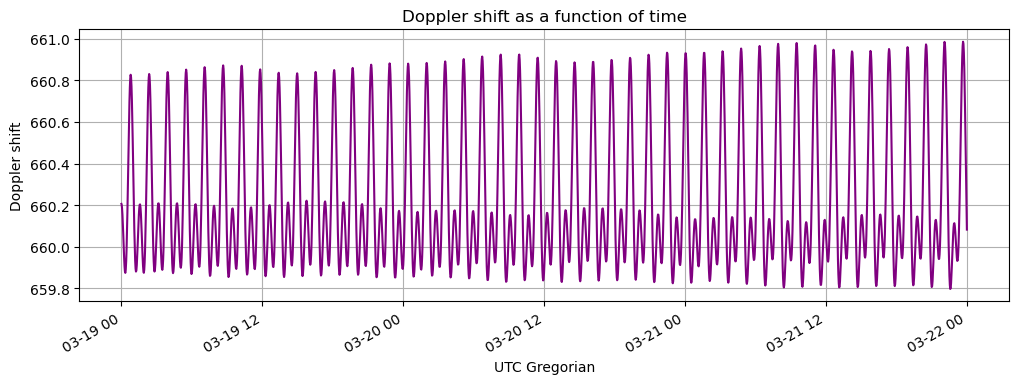

In [103]:
# plot doppler shift as a function of time
dfds = dfds[['UTC Gregorian', 'Doppler shift']]

%matplotlib inline
dfds.plot(x='UTC Gregorian', y='Doppler shift', ylabel='Doppler shift', color='purple', title='Doppler shift as a function of time', grid=True, legend=False, figsize=(12,4))

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### Taking the first pass to plot Doppler curve

In [106]:
dfds

,UTC Gregorian,Doppler shift
0,2024-03-19 00:00:00.000,660.206083
1,2024-03-19 00:01:00.000,660.203762
2,2024-03-19 00:03:00.753,660.187558
3,2024-03-19 00:05:14.914,660.153456
4,2024-03-19 00:07:18.841,660.109748
...,...,...
2052,2024-03-21 23:52:57.777,660.518571
2053,2024-03-21 23:55:10.597,660.375442
2054,2024-03-21 23:57:21.107,660.237041
2055,2024-03-21 23:59:24.462,660.115036


In [107]:
dfds.index = dfds['UTC Gregorian']

dfsection = dfds.loc['2024-03-19 00:45:00.000':'2024-03-19 01:15:00.000']
dfsection 

,UTC Gregorian,Doppler shift
UTC Gregorian,,
2024-03-19 00:45:03.798,2024-03-19 00:45:03.798,660.810501
2024-03-19 00:47:06.251,2024-03-19 00:47:06.251,660.827319
2024-03-19 00:49:11.984,2024-03-19 00:49:11.984,660.815574
2024-03-19 00:51:25.343,2024-03-19 00:51:25.343,660.772210
2024-03-19 00:53:30.719,2024-03-19 00:53:30.719,660.705067
2024-03-19 00:55:32.165,2024-03-19 00:55:32.165,660.619546
2024-03-19 00:57:36.315,2024-03-19 00:57:36.315,660.516824
2024-03-19 00:59:34.815,2024-03-19 00:59:34.815,660.410463
2024-03-19 01:01:46.274,2024-03-19 01:01:46.274,660.290199


<AxesSubplot:title={'center':'Doppler shift as a function of time'}, xlabel='UTC Gregorian', ylabel='Doppler shift (KHz)'>

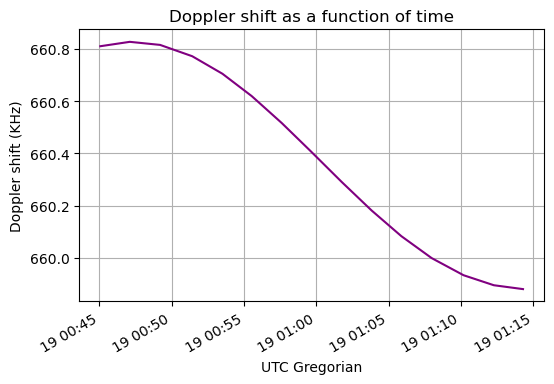

In [108]:
# plot doppler shift as a function of time
#dfsection = dfds[['UTC Gregorian', 'Doppler shift']]

%matplotlib inline
dfsection.plot(x='UTC Gregorian', y='Doppler shift', ylabel='Doppler shift (KHz)', color='purple', title='Doppler shift as a function of time', legend=False, grid=True, figsize=(6,4))

-------------------------------------------------------------------------------------------------------------------------------------------------------